<a href="https://colab.research.google.com/github/sammainahkinya1404/Machine-Learning/blob/main/K_means_Color_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Import Neccesary LIbraries
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [14]:
# Load the two images
img1 = Image.open("/content/drive/MyDrive/Skin/image1.jpg")
img2 = Image.open("/content/drive/MyDrive/Skin/image2.jpg")

In [15]:
# Convert the images to numpy arrays
img1_np = np.array(img1)
img2_np = np.array(img2)


In [16]:
# Set the number of clusters
k = 3

In [17]:
# Initialize the k-means model
kmeans = KMeans(n_clusters=k)

In [18]:
# Perform the k-means clustering on the first image
img1_clusters = kmeans.fit_predict(img1_np.reshape(-1, 3))

In [19]:
# Perform the k-means clustering on the second image 
img2_clusters = kmeans.fit_predict(img2_np.reshape(-1, 3))

In [8]:

# Create probability maps for the two images
img1_prob_map = np.zeros((img1_np.shape[0], img1_np.shape[1], k))
img2_prob_map = np.zeros((img2_np.shape[0], img2_np.shape[1], k))

In [20]:
# Fill in the probability maps
for i in range(k):
    img1_prob_map[:,:,i] = (img1_clusters == i).reshape(img1_np.shape[0], img1_np.shape[1])
    img2_prob_map[:,:,i] = (img2_clusters == i).reshape(img2_np.shape[0], img2_np.shape[1])


In [21]:
# Set the threshold for detecting skin regions
threshold = 0.5



In [22]:
# Create binary masks for skin regions in the two images
img1_skin_mask = (img1_prob_map[:,:,0] > threshold)
img2_skin_mask = (img2_prob_map[:,:,0] > threshold)

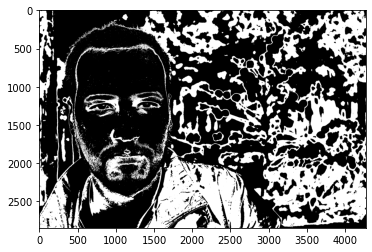

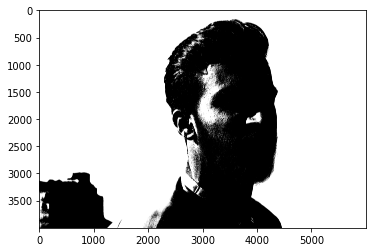

In [12]:
# Display the skin masks
plt.imshow(img1_skin_mask, cmap='gray')
plt.show()
plt.imshow(img2_skin_mask, cmap='gray')
plt.show()